
#Developing a Machine learning Model for predicting the house Price in two major cities in Nigeria

New Section

Importing The Necessary Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.preprocessing import LabelEncoder

**Explaining the function of each library used**
1. train_test_split: This function is used to perform the train test split procedures, which splits a dataset into two subsets: a training set and a test set

2. mean_absolute_error: MAE tells us how much our predictions are off from the actual values in the dataset. It helps us understand the accuracy of our model by measuring the absolute errors between predicted and true values.

3. OneHotEncoder: Encode categorical features as a one-hot numeric array

4. make_pipeline: The make_pipeline() method is used to Create a Pipeline using the provided estimators
5. LinearRegression: this is the machine learning algorithm that we chose in making our prediction.

6. Ridge: Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity.

*what is multicollinearity*
Multicollinearity occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model

Loading the house price dataset

In [ ]:
Nigerian_house_price_data = pd.read_csv('/content/Nig_house_price_dataset.csv')

In [ ]:
# printing the entire dataset
Nigerian_house_price_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
# Checking the First 10 rows of the dataset
Nigerian_house_price_data.head(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
7,2,2,3,6,Detached Bungalow,Epe,Lagos,12000000.0
8,1,1,1,1,Detached Duplex,Lekki,Lagos,200000000.0
9,4,4,5,5,Detached Duplex,Ajah,Lagos,60000000.0


In [ ]:
# Checking for the last 10 rows in the dataset
Nigerian_house_price_data.tail(10)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
24316,5,5,6,5,Detached Duplex,Lekki,Lagos,3.200000e+08
24317,4,4,5,3,Terraced Duplexes,Lekki,Lagos,7.500000e+07
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,1.100000e+08
24319,8,8,9,4,Detached Duplex,Guzape District,Abuja,1.000000e+09
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,8.000000e+07
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,1.500000e+07
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,2.500000e+07
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,6.800000e+07
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,7.800000e+07
24325,4,5,5,4,Detached Duplex,Lekki,Lagos,6.500000e+07


In [ ]:
# Checking for Basic information about the dataset
Nigerian_house_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  int64  
 1   bathrooms      24326 non-null  int64  
 2   toilets        24326 non-null  int64  
 3   parking_space  24326 non-null  int64  
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 1.5+ MB


In [ ]:
# Checking for unique states and town in the dataset
# Unique number of states

state_no = Nigerian_house_price_data["state"].nunique()
print( f"There are {state_no} unique states in the dataset")
print()
# Unique number of towns
towns_no = Nigerian_house_price_data["town"].nunique()
print(f"There are {towns_no} unique towns in the dataset")

There are 25 unique states in the dataset

There are 189 unique towns in the dataset


In [ ]:
Nigerian_house_price_data.rename(columns={'hn': 'price'}, inplace=True)
Nigerian_house_price_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2,2,2,4,Block of Flats,Kabusa,Abuja,15000000.0
24322,4,5,5,4,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
# Checking for the most expensive real estate towns in the Dataset

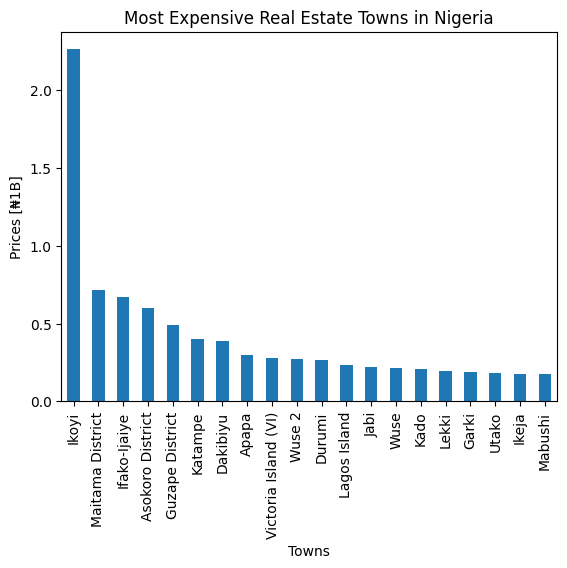

In [ ]:
(
    (Nigerian_house_price_data.groupby("town")['price']
    .mean()/1e9)
    .sort_values(ascending=False)
    .head(20)
    .plot(kind="bar",
         xlabel = 'Towns',
         ylabel = "Prices [₦1B]",
         title = "Most Expensive Real Estate Towns in Nigeria")
);

In [ ]:
# Detecting suspected outlier
print(Nigerian_house_price_data[Nigerian_house_price_data["town"]=="Ikoyi"].max())
print(Nigerian_house_price_data[Nigerian_house_price_data["town"]=="Ifako-Ijaiye"].max())

bedrooms                         9
bathrooms                        9
toilets                          9
parking_space                    9
title            Terraced Duplexes
town                         Ikoyi
state                        Lagos
price              1800000000000.0
dtype: object
bedrooms                         7
bathrooms                        8
toilets                          8
parking_space                    8
title            Terraced Bungalow
town                  Ifako-Ijaiye
state                        Lagos
price                55000000000.0
dtype: object


In [ ]:
# Removing outlier
trim_df = q1, q9 = Nigerian_house_price_data["price"].quantile([0.15,0.85])
mask_df = Nigerian_house_price_data["price"].between(q1, q9)
trimmed_df = Nigerian_house_price_data[mask_df]
trimmed_df

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0
6,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0
8,1,1,1,1,Detached Duplex,Lekki,Lagos,200000000.0
...,...,...,...,...,...,...,...,...
24318,4,5,5,4,Semi Detached Duplex,Lekki,Lagos,110000000.0
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [ ]:
few_records = trimmed_df["state"].value_counts()
few_records

state
Lagos        13805
Abuja         2462
Rivers         339
Oyo            229
Imo            195
Ogun           141
Enugu           96
Anambara        83
Edo             51
Delta           42
Akwa Ibom       13
Kaduna           8
Ekiti            5
Abia             5
Kogi             4
Nasarawa         4
Osun             3
Kwara            2
Borno            2
Bayelsa          1
Niger            1
Name: count, dtype: int64

In [ ]:
# Removing States with few entries to stabilize the average
trimmed_df = trimmed_df[trimmed_df['state'].isin(few_records[few_records < 100].index)]

In [ ]:
trimmed_df["state"].value_counts()

state
Enugu        96
Anambara     83
Edo          51
Delta        42
Akwa Ibom    13
Kaduna        8
Ekiti         5
Abia          5
Kogi          4
Nasarawa      4
Osun          3
Kwara         2
Borno         2
Bayelsa       1
Niger         1
Name: count, dtype: int64

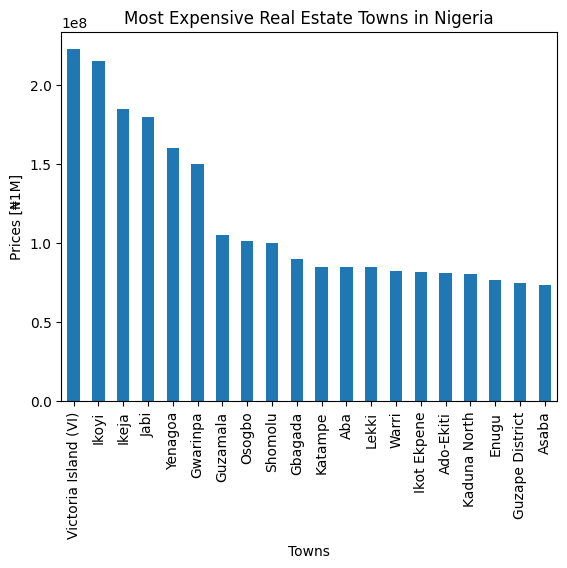

In [ ]:
(
    (trimmed_df.groupby("town")['price']
    .mean())
    .sort_values(ascending=False)
    .head(20)
    .plot(kind="bar",
         xlabel = 'Towns',
         ylabel = "Prices [₦1M]",
         title = "Most Expensive Real Estate Towns in Nigeria")
);

trimmed_df_lagos = trimmed_df[trimmed_df["state"]=="Lagos"]
(
    (trimmed_df_lagos.groupby("town")["price"].mean()/1e6)
    .sort_values(ascending=False)
    .head(10).plot(kind="bar",
                   xlabel = "Towns",
                   ylabel = "Prices [₦1M]",
                   title = "Average Price of Houses by Towns in Lagos"
                  )
);

In [ ]:
# checking the number of towns with number of houses in lagos
trimmed_df_lagos["town"].value_counts()

In [ ]:
# Resetting the index of lekki dataframe
df_lekki = trimmed_df_lagos[trimmed_df_lagos['town']=="Lekki"].reset_index()
df_lekki.drop(columns=["index", "state"], inplace=True)
df_lekki

In [ ]:
# Renaming the title column house_type
df_lekki.rename({"title": "house_type"}, axis = 1, inplace=True)
df_lekki.head()

NameError: name 'df_lekki' is not defined

In [ ]:
df_lekki["total_rooms"] = df_lekki["bedrooms"] + df_lekki["bathrooms"] + df_lekki["toilets"] + df_lekki["parking_space"]
# Swap the positions of the price and total_rooms columns
cols = list(df_lekki.columns)
cols[-1], cols[-2] = cols[-2], cols[-1]
df_lekki = df_lekki[cols]

In [ ]:
# Viewing the lekki dataframe
df_lekki

In [ ]:
df_lekki

In [ ]:
# Drop multi-collinearity and low-cardinality features and feature not correlating with target
df_lekki.drop(columns=["bathrooms", "toilets", "town", "total_rooms"], inplace=True)


In [ ]:
trim = q1, q9 = df_lekki["price"].quantile([0.1,0.9])
mask = df_lekki["price"].between(q1,q9)
trimmed_df_lekki = df_lekki[mask]
trimmed_df_lekki

In [ ]:
# checking the house prices in lekki in ascending oreder
trimmed_df_lekki["price"].sort_values().tail(10)

In [ ]:
# Splitting the dataset into x and y variables
target =  "price"
features = (trimmed_df_lekki.drop(columns = target)).columns
y = trimmed_df_lekki[target]
X = trimmed_df_lekki[features]
print(X)
print()
print()
print(y)

In [ ]:
# Using the train test split function to split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Building the model for the prediction

regressor=LinearRegression
regressor = make_pipeline(OneHotEncoder(),Ridge())
regressor.fit(X_train, y_train)

# using the model for prdiction and comparing the result with the actual values
y_predict =regressor.predict(X_train)

In [ ]:
# model evaluation
from sklearn.metrics import mean_absolute_error
mbe = mean_absolute_error(y_predict, y_train)
mbe

In [ ]:
x=np.array([['bedrooms', 'parking_space','house_type' ]])
x

In [ ]:
# using a function
def make_prediction(bedrooms, parking_space, house_type):
    data = {"bedrooms":bedrooms,
            "parking_space":parking_space,
            "house_type":house_type

    }

    df = pd.DataFrame(data, index=[0])
    prediction = regressor.predict(df).round(2)[0]
    return f"Predicted apartment price: ₦{prediction}"

In [ ]:
# Using the model for making predictions
make_prediction(5, 5, "Block of Flats")

In [ ]:
interact(
    make_prediction,
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
    ),
    parking_space=IntSlider(
        min=X_train["parking_space"].min(),
        max=X_train["parking_space"].max(),
        step=1,
        value=X_train["parking_space"].mean(),
    ),
    house_type=Dropdown(options=sorted(X_train["house_type"].unique())),
);



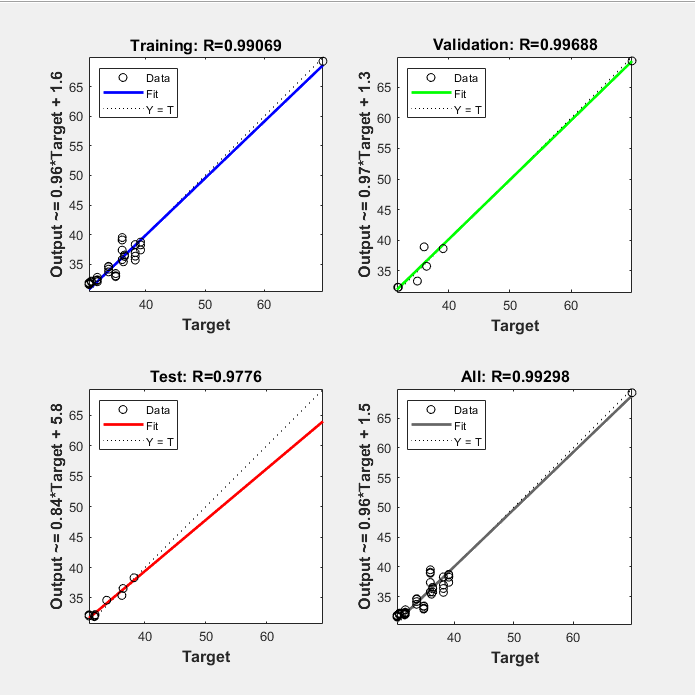

In [ ]:
from IPython.display  import Image
Image ('/content/regression plot.png')


# showing the regression plot generate by the prediction model




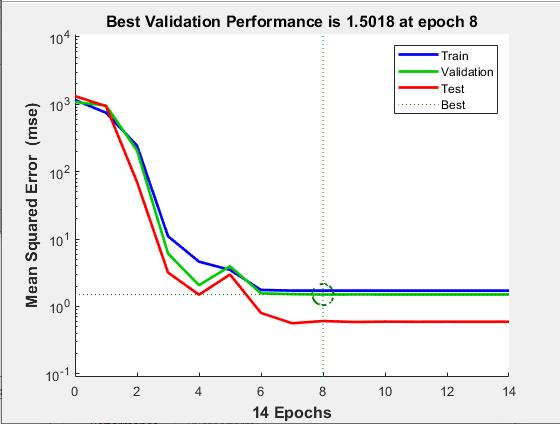

In [ ]:
from IPython.display  import Image
Image ('/content/performance plot.png')

# showing the performance plot generate by the priction model.